# Yr.no API Exploration Notebook

In [ ]:
"""
headers = {
    "User-Agent": "gdd-timing-system/0.1 (eveliinahampus@gmail.com)"
}
"""


In [ ]:
"""
import requests
import pandas as pd

# Example URL (modify lat and lon for location Yr.no API call)
url = "https://api.met.no/weatherapi/locationforecast/2.0/compact?lat=28.6&lon=77.2"

response = requests.get(url, headers=headers)
data = response.json()
"""

In [ ]:
"""
# Example: extract time-series
timeseries = data['properties']['timeseries']

# Create a DataFrame
df = pd.json_normalize(timeseries)

# Save to Parquet
df.to_parquet('../data/weatherdata_newdelhi.parquet', index=False)

"""

In [45]:
import pandas as pd

df_newdelhi = pd.read_parquet('../data/weatherdata_newdelhi.parquet')
df_newdelhi.head()

,time,data.instant.details.air_pressure_at_sea_level,data.instant.details.air_temperature,data.instant.details.cloud_area_fraction,data.instant.details.relative_humidity,data.instant.details.wind_from_direction,data.instant.details.wind_speed,data.next_12_hours.summary.symbol_code,data.next_1_hours.summary.symbol_code,data.next_1_hours.details.precipitation_amount,data.next_6_hours.summary.symbol_code,data.next_6_hours.details.precipitation_amount
0,2025-04-28T09:00:00Z,1001.5,40.8,35.9,9.2,138.7,1.2,fair_day,fair_day,0.0,partlycloudy_day,0.0
1,2025-04-28T10:00:00Z,1001.1,41.1,79.7,8.7,41.1,2.2,fair_day,partlycloudy_day,0.0,partlycloudy_day,0.0
2,2025-04-28T11:00:00Z,1001.0,39.7,100.0,10.0,50.0,4.4,clearsky_night,cloudy,0.0,fair_night,0.0
3,2025-04-28T12:00:00Z,1000.9,37.0,31.2,15.6,46.9,4.7,clearsky_night,fair_day,0.0,fair_night,0.0
4,2025-04-28T13:00:00Z,1001.7,35.3,95.3,19.9,56.3,3.5,clearsky_night,partlycloudy_night,0.0,clearsky_night,0.0


In [47]:
df_newdelhi['data.instant.details.air_temperature'].head()

0    40.8
1    41.1
2    39.7
3    37.0
4    35.3
Name: data.instant.details.air_temperature, dtype: float64

In [48]:
# Importing necessary libraries
import matplotlib.pyplot as plt

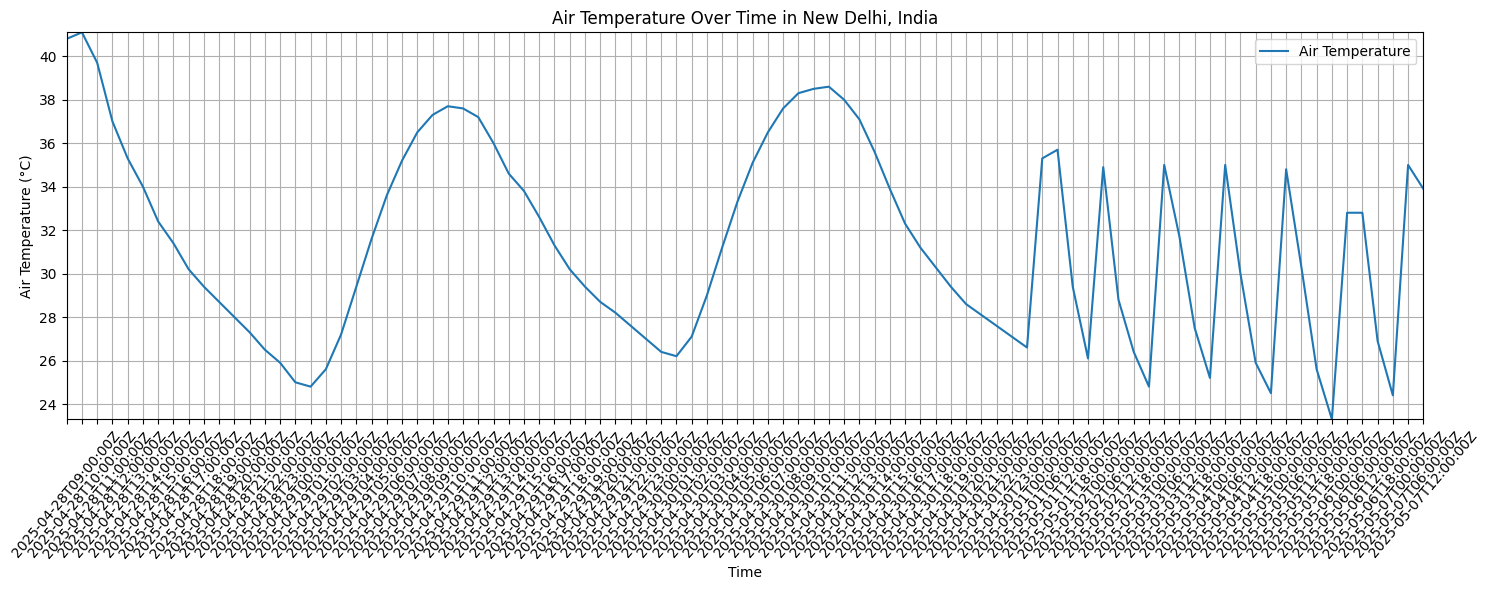

In [49]:
# Temperature changes over time
plt.figure(figsize=(15, 6))
plt.plot(df_newdelhi['time'], df_newdelhi['data.instant.details.air_temperature'], label='Air Temperature')
plt.title('Air Temperature Over Time in New Delhi, India')
plt.xlabel('Time')
plt.ylabel('Air Temperature (°C)')
plt.xticks(rotation=50)
plt.xlim(df_newdelhi['time'].min(), df_newdelhi['time'].max())
plt.ylim(df_newdelhi['data.instant.details.air_temperature'].min(), df_newdelhi['data.instant.details.air_temperature'].max())
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()




- Partition time before saving